## LIBRARIES

In [1]:
import math
import numpy as np
from PIL import Image
import pandas as pd

# File things
import os

# CROSS VALIDATION
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

#TEST RESULT
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#PREPROCESSING (Normalize)
from sklearn.preprocessing import MinMaxScaler

#SCATTER PLOT
import matplotlib.pyplot as plt
import seaborn as sns

# Image Embedding
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model

# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#NAIVE BAYES
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## IMAGE EMBEDDING

In [5]:
# PRERPOCESS IMAGE
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")   # TURN IMAGE TO 3 CHANNELS (*input channel needed for InceptionV3)
    img = img.resize((299, 299))                  # RESIZE IMAGE (*size needed for InceptionV3)
    img_array = np.array(img)                     # TURN TO 3D ARRAY (299, 299, 3)
    img_array = np.expand_dims(img_array, axis=0) # TURN TO 4D ARRAY (1, 299, 299, 3) [1, batchSize]
    img_array = preprocess_input(img_array)       # APPLY Inception V3 PREPROCESSING
    return img_array  # 4D ARRAY

# USE THE MODEL TO MAKE VECTOR REPRESENTATION OF THE IMAGE
def generate_embedding(image_path):
    img_array = preprocess_image(image_path)      # 4D ARRAY (batch_size, SX, SY, colorChannels)
    embedding = model.predict(img_array)
    return embedding.flatten()                    # TURN NEW FEATURES TO 1D ARRAY

# GENERATE EMBEDDING FOR EVERY SUBFOLDER (category = subFolderName) AND OUTPUT A CSV (*containing new features) (LIKE ORANGE)
def process_folder(folder_path, output_csv):
    embeddings = []  # NEW FEATURES ADDED BY THE MODEL
    image_names = [] # IMAGE NAMES
    categories = []  # CATEGORY NAME BASED ON FOLDER NAME
    
    for subdir, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                image_path = os.path.join(subdir, filename)
                category = os.path.basename(subdir)
                print(f"Processing: {filename} from category: {category}")
                
                embedding = generate_embedding(image_path) # GENERATE EMBEDDING

                # PUT TO DESIGNATED ARRAYS
                embeddings.append(embedding)
                image_names.append(filename)
                categories.append(category)  
    
    # CREATE TABLE (DataFrame) AND INSERT NEW COLUMNS
    df = pd.DataFrame(embeddings)
    df.insert(0, "Category", categories)     # ADD CATEGORY TO 1ST COLUMN
    df.insert(1, "Image Name", image_names)  # ADD IMAGE NAME TO 2ND COLUMN
    
    # DataFrame TO CSV
    df.to_csv(output_csv, index=False)
    print(f"Embeddings saved to {output_csv}")

In [6]:
#*******************************************BASE IMAGE EMBEDDING*******************************************
#LOAD THE EMBEDDER MODEL (InceptionV3) *default pretrained weights (imagenet)
base_model = InceptionV3(weights='imagenet', include_top=True)

#CREATE NEW MODEL THAT OUTPUTS VECTOR REPRESENTATION OF THE IMAGE
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
#*******************************************BASE IMAGE EMBEDDING*******************************************




# INCLUDE BOTH NORMAL AND PNEUMONIA
#*******************************************TRAIN IMAGE EMBEDDING*******************************************
print("TRAIN EMBEDDING")
#TRAIN FOLDER LOCATION
Train_FileLoc = r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Pneumonia Detection (Image Classification)\Datasets\FIXED DATASETS\TRAIN"  # Replace with your folder path

#FILE LOCATION FOR THE CSV FILE (w added features)
TRAIN_CSV_Folder = ".CSV FILE (ADDED FEATURES)"                                       
TRAIN_CSV_FileLoc = os.path.join(TRAIN_CSV_Folder, "image_embeddings_TRAIN.csv") #FILENAME

#RETURNS .CSV FILE
process_folder(Train_FileLoc, TRAIN_CSV_FileLoc)
#*******************************************TRAIN IMAGE EMBEDDING*******************************************





# INCLUDE BOTH NORMAL AND PNEUMONIA
#*******************************************TEST IMAGE EMBEDDING*******************************************
print("TEST EMBEDDING")
#TEST FOLDER LOCATION
Test_FileLoc = r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Pneumonia Detection (Image Classification)\Datasets\FIXED DATASETS\TEST"  # Replace with your folder path

#FILE LOCATION FOR THE CSV FILE (w added features)
TEST_CSV_Folder = ".CSV FILE (ADDED FEATURES)"                                       
TEST_CSV_FileLoc = os.path.join(TEST_CSV_Folder, "image_embeddings_TEST.csv") #FILENAME

#RETURNS .CSV FILE
process_folder(Test_FileLoc, TEST_CSV_FileLoc)
#*******************************************TEST IMAGE EMBEDDING*******************************************

TRAIN EMBEDDING
Processing: IM-0145-0001.jpeg from category: NORMAL
1/1 [==============================] - 4s 4s/step
Processing: IM-0147-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 126ms/step
Processing: IM-0149-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 105ms/step
Processing: IM-0151-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 92ms/step
Processing: IM-0152-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 102ms/step
Processing: IM-0154-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 106ms/step
Processing: IM-0156-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 90ms/step
Processing: IM-0158-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 99ms/step
Processing: IM-0160-0001.jpeg from category: NORMAL
1/1 [==============================] - 0s 100ms/step
Processing: IM-0162-0001.jpeg from category: 

## IMAGE EMBEDDED FILE AND PREPROCESSING

In [2]:
#WHOLE FILE = df
#******************************************FILE TRAIN******************************************
# FILE SETUP
# FILE LOCATION
df1_train = pd.read_csv(r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Pneumonia Detection (Image Classification)\Jupyter Files\.CSV FILE (ADDED FEATURES)\image_embeddings_TRAIN.csv")

# SHOW COLUMN TYPES AND DETAILS
print(df1_train.info())  
#******************************************FILE TRAIN******************************************





#******************************************FILE TEST******************************************
# FILE SETUP
# FILE LOCATION
df2_test = pd.read_csv(r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Pneumonia Detection (Image Classification)\Jupyter Files\.CSV FILE (ADDED FEATURES)\image_embeddings_TEST.csv")

# SHOW COLUMN TYPES AND DETAILS
print(df2_test.info())  
#******************************************FILE TEST******************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Columns: 2050 entries, Category to 2047
dtypes: float64(2048), object(2)
memory usage: 4.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Columns: 2050 entries, Category to 2047
dtypes: float64(2048), object(2)
memory usage: 2.5+ MB
None


In [3]:
#******************************************GET TRAIN AND TEST DATA ROLES******************************************
Train_X = df1_train.drop(columns=['Category', 'Image Name'])   # FEATURES (EXCEPT EngagementLevel)
Train_Y = df1_train['Category']                                # TARGET

Test_X = df2_test.drop(columns=['Category', 'Image Name'])     # FEATURES (EXCEPT EngagementLevel)
Test_Y = df2_test['Category']                                  # TARGET
#******************************************GET TRAIN AND TEST DATA ROLES******************************************





#******************************************NORMALIZE VALUES******************************************#
scaler = MinMaxScaler()

Train_X_normalized = scaler.fit_transform(Train_X)
Test_X_normalized = scaler.fit_transform(Test_X)

scaler = StandardScaler()

Train_X_stamdarized = scaler.fit_transform(Train_X)
Test_X_stamdarized = scaler.fit_transform(Test_X)
#******************************************NORMALIZE VALUES******************************************#




In [5]:
#******************************************IMAGE VIEWER SETUP******************************************#
normal_folder = r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Pneumonia Detection (Image Classification)\Datasets\FIXED DATASETS\TRAIN\NORMAL"
pneumonia_folder = r"G:\MIKE\Programming\2024\Repositories\Atillo-ML\Updated\Pneumonia Detection (Image Classification)\Datasets\FIXED DATASETS\TRAIN\PNEUMONIA"

# ALL IMAGE FILE PATH AND LABELS
image_paths = []
labels = []
normal_count = 0
pneumonia_count = 0

# NORMAL images
for img_file in os.listdir(normal_folder):
    image_paths.append(os.path.join(normal_folder, img_file))
    labels.append("NORMAL")
    normal_count += 1

# PNEUMONIA images
for img_file in os.listdir(pneumonia_folder):
    image_paths.append(os.path.join(pneumonia_folder, img_file))
    labels.append("PNEUMONIA")
    pneumonia_count += 1

# TURN TO NUMPY ARRAY
true_labels = np.array(labels)
image_paths = np.array(image_paths)


print("true_labels", len(true_labels))
print("Normal count    : ", normal_count)
print("Pneumonia count : ", pneumonia_count)
#******************************************IMAGE VIEWER SETUP******************************************#

true_labels 290
Normal count    :  145
Pneumonia count :  145


# ------------------------------LOGISTIC REGRESSION------------------------------

10 Cross-Validation Results:
Accuracy Score  : 94.14%
F1 Score        : 94.12%
Recall Score    : 94.83%
Precision Score : 94.47% 



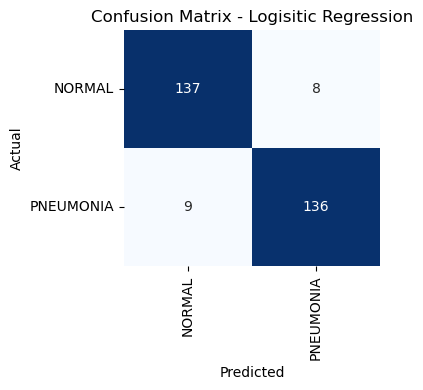

Number of Misclassified Images:  17


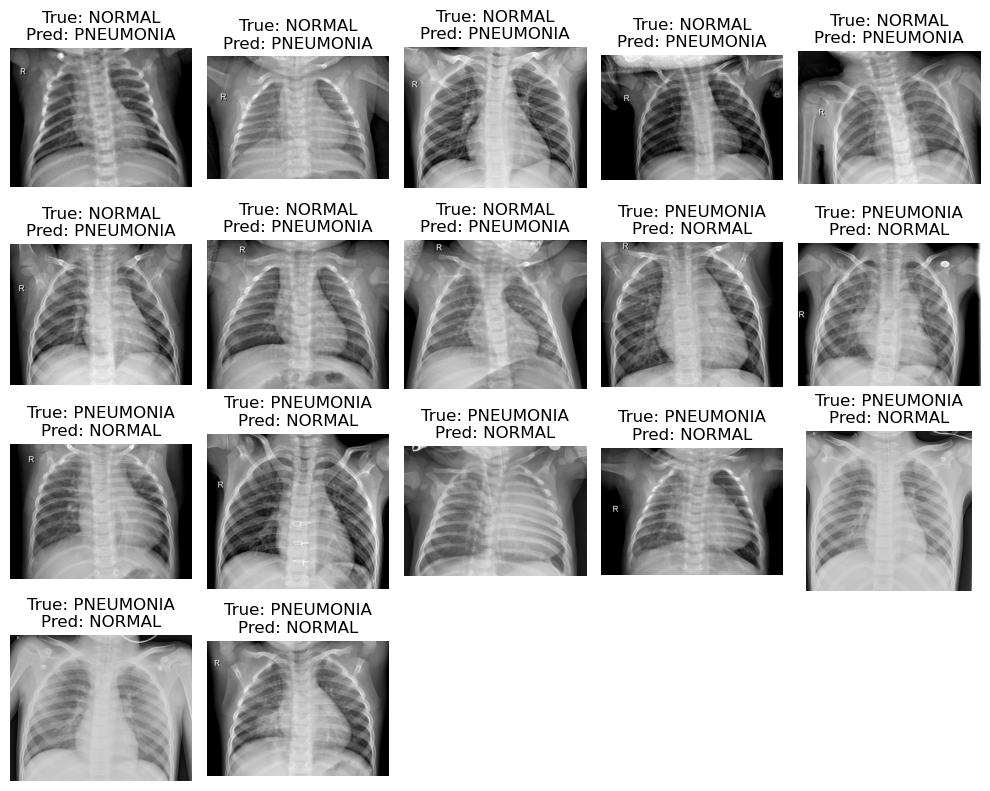

In [11]:
#USING X_train AND y_train in TREE MODEL
#******************************************LOGISTIC REGRESSION******************************************
log_reg = LogisticRegression( 
    penalty      = 'l2',
    C            = 1,
    random_state = 0,
    max_iter     = 100,
    solver='lbfgs'                # Multi-Class Logistic Regression solver
)

log_reg.fit(Train_X_normalized, Train_Y)
#******************************************LOGISTIC REGRESSION******************************************




#UNUSED
#******************************************LOGISTIC REGRESSION PREDICTION******************************************
#y_pred_Log_Reg = log_reg.predict(Test_X_normalized)
#******************************************LOGISTIC REGRESSION PREDICTION******************************************





#******************************************CROSS VALIDATION METRIC******************************************
#CROSS VALIDATION SCORE
accuracy_results  = cross_validate(log_reg, Train_X_normalized, Train_Y, cv=10, scoring='accuracy')
accuracy_scores = accuracy_results['test_score']
mean_accuracy = np.mean(accuracy_scores) * 100

f1_results = cross_validate(log_reg, Train_X_normalized, Train_Y, cv=10, scoring='f1_weighted')
f1_scores = f1_results['test_score']
mean_f1 = np.mean(f1_scores) * 100

recall_results = cross_validate(log_reg, Train_X_normalized, Train_Y, cv=10, scoring='recall_weighted')
recall_scores = recall_results['test_score']
mean_recall = np.mean(recall_scores) * 100

precision_results = cross_validate(log_reg, Train_X_normalized, Train_Y, cv=10, scoring='precision_weighted')
precision_scores = precision_results['test_score']
mean_precision = np.mean(precision_scores) * 100

#DRAW VALIDATION SCORE
print(f"10 Cross-Validation Results:")
print(f"Accuracy Score  : {mean_accuracy:.2f}%")
print(f"F1 Score        : {mean_f1:.2f}%")
print(f"Recall Score    : {mean_recall:.2f}%")
print(f"Precision Score : {mean_precision:.2f}% \n")
#******************************************CROSS VALIDATION METRIC******************************************





#******************************************CROSS VALIDATION CM******************************************
# Get predictions from cross-validation
y_pred_cv_log_reg = cross_val_predict(log_reg, Train_X_normalized, Train_Y, cv=10)

cm = confusion_matrix(Train_Y, y_pred_cv_log_reg)

labels = ["NORMAL", "PNEUMONIA"]

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logisitic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.xticks(rotation=90, fontsize=10)  
plt.yticks(rotation=0, fontsize=10)   

plt.tight_layout()

plt.show()
#******************************************CROSS VALIDATION CM******************************************





#******************************************IMAGE VIEWER******************************************
# Misclassified Indices Using Cross-Validation Predictions
misclassified_indices_cv = [i for i, (true, pred) in enumerate(zip(true_labels, y_pred_cv_log_reg)) if true != pred]

print("Number of Misclassified Images: ",len(misclassified_indices_cv))

# Display up to 17 misclassified images (or less, if fewer misclassified images)
num_images = min(100, len(misclassified_indices_cv))  # Display up to 17 misclassified images

# Calculate rows and columns for a square grid
grid_size = math.ceil(math.sqrt(num_images))  # Grid size for square layout

plt.figure(figsize=(10, 10))  # Adjust figure size

for idx, mis_idx in enumerate(misclassified_indices_cv[:num_images]):
    # Load image
    img_path = image_paths[mis_idx]
    img = plt.imread(img_path)  # Read the image
    
    # Get true and predicted labels
    true_label = true_labels[mis_idx]
    predicted_label = y_pred_cv_log_reg[mis_idx]

    # Plot the image
    plt.subplot(grid_size, grid_size, idx + 1)
    plt.imshow(img, cmap='gray')  # Adjust 'gray' if images are in grayscale
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
#******************************************IMAGE VIEWER******************************************

# ------------------------------SVM------------------------------

10 Cross-Validation Results:
Accuracy Score  : 94.83%
F1 Score        : 94.80%
Recall Score    : 94.83%
Precision Score : 95.28% 



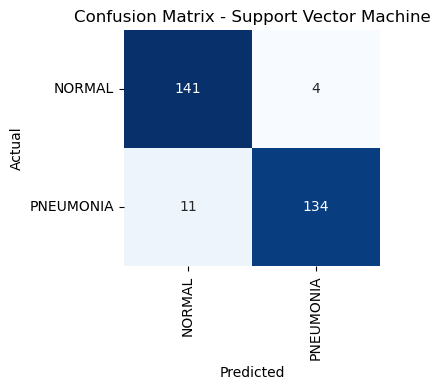

Number of Misclassified Images:  15


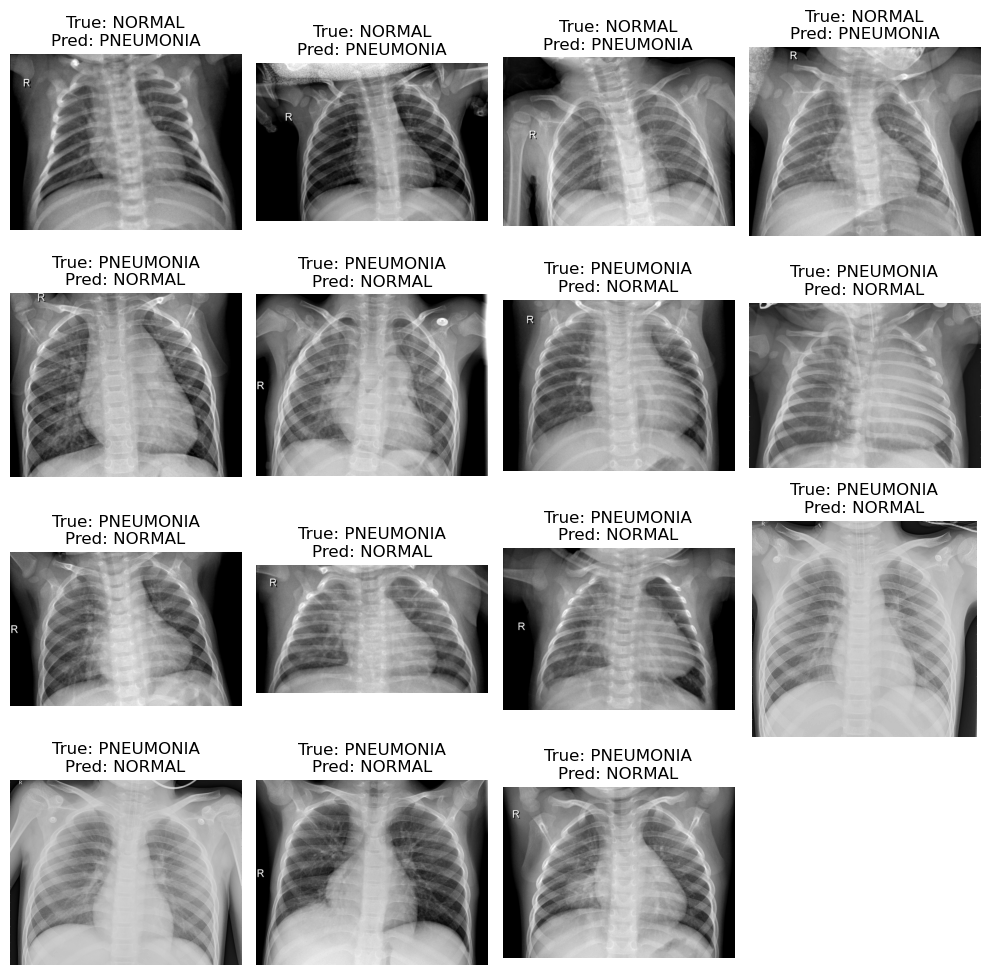

In [8]:
#******************************************SVM******************************************
svm_classifier = SVC(
    kernel='rbf',   # KERNEL
    C=1,            # COST PARAMETER RELATED TO COMPLEXITY BOUND
    gamma='auto',   # G
    tol=0.001,      # NUMERICAL TOLERANCE
    max_iter=400    # ITERATION LIMIT
)

svm_classifier.fit(Train_X_stamdarized, Train_Y)
#******************************************SVM******************************************




#UNUSED
#******************************************SVM PREDICTION******************************************
#y_pred_SVM = svm_classifier.predict(X_test_scaled)
#******************************************SVM PREDICTION******************************************




#******************************************CROSS VALIDATION METRICS******************************************
#CROSS VALIDATION SCORE
accuracy_results  = cross_validate(svm_classifier, Train_X_stamdarized, Train_Y, cv=10, scoring='accuracy')
accuracy_scores = accuracy_results['test_score']
mean_accuracy = np.mean(accuracy_scores) * 100

f1_results = cross_validate(svm_classifier, Train_X_stamdarized, Train_Y, cv=10, scoring='f1_weighted')
f1_scores = f1_results['test_score']
mean_f1 = np.mean(f1_scores) * 100

recall_results = cross_validate(svm_classifier, Train_X_stamdarized, Train_Y, cv=10, scoring='recall_weighted')
recall_scores = recall_results['test_score']
mean_recall = np.mean(recall_scores) * 100

precision_results = cross_validate(svm_classifier, Train_X_stamdarized, Train_Y, cv=10, scoring='precision_weighted')
precision_scores = precision_results['test_score']
mean_precision = np.mean(precision_scores) * 100

#DRAW VALIDATION SCORE
print(f"10 Cross-Validation Results:")
print(f"Accuracy Score  : {mean_accuracy:.2f}%")
print(f"F1 Score        : {mean_f1:.2f}%")
print(f"Recall Score    : {mean_recall:.2f}%")
print(f"Precision Score : {mean_precision:.2f}% \n")
#******************************************CROSS VALIDATION METRICS******************************************




#******************************************CROSS VALIDATION CM******************************************
# Get predictions from cross-validation
y_pred_cv_svm = cross_val_predict(svm_classifier, Train_X_stamdarized, Train_Y, cv=10)

cm = confusion_matrix(Train_Y, y_pred_cv_svm)

labels = ["NORMAL", "PNEUMONIA"]

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.xticks(rotation=90, fontsize=10)  
plt.yticks(rotation=0, fontsize=10)   

plt.tight_layout()

plt.show()
#******************************************CROSS VALIDATION CM******************************************




#******************************************IMAGE VIEWER******************************************
# Misclassified Indices Using Cross-Validation Predictions
misclassified_indices_cv = [i for i, (true, pred) in enumerate(zip(true_labels, y_pred_cv_svm)) if true != pred]

print("Number of Misclassified Images: ",len(misclassified_indices_cv))

# Display up to 17 misclassified images (or less, if fewer misclassified images)
num_images = min(100, len(misclassified_indices_cv))  # Display up to 17 misclassified images

# Calculate rows and columns for a square grid
grid_size = math.ceil(math.sqrt(num_images))  # Grid size for square layout

plt.figure(figsize=(10, 10))  # Adjust figure size

for idx, mis_idx in enumerate(misclassified_indices_cv[:num_images]):
    # Load image
    img_path = image_paths[mis_idx]
    img = plt.imread(img_path)  # Read the image
    
    # Get true and predicted labels
    true_label = true_labels[mis_idx]
    predicted_label = y_pred_cv_svm[mis_idx]

    # Plot the image
    plt.subplot(grid_size, grid_size, idx + 1)
    plt.imshow(img, cmap='gray')  # Adjust 'gray' if images are in grayscale
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
#******************************************IMAGE VIEWER******************************************

# ------------------------------NAIVE BAYES------------------------------

10 Cross-Validation Results:
Accuracy Score  : 91.03%
F1 Score        : 90.95%
Recall Score    : 94.83%
Precision Score : 91.86% 



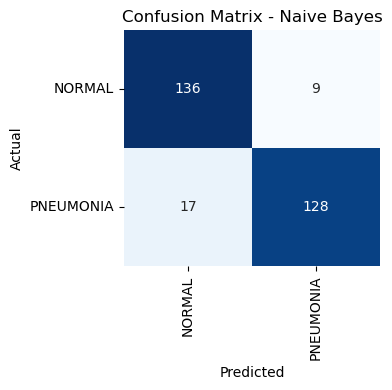

Number of Misclassified Images:  26


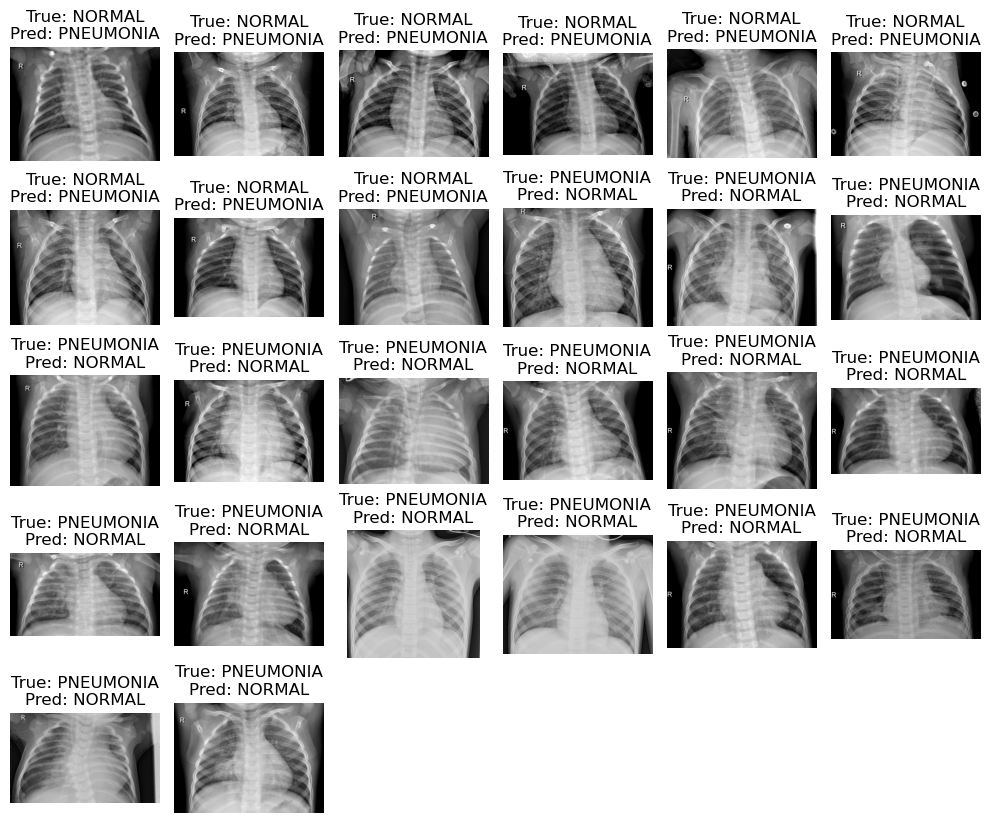

In [13]:
#******************************************GAUSSIAN NAIVE BAYES******************************************
naiveBayes_classifier = GaussianNB()

naiveBayes_classifier.fit(Train_X_normalized, Train_Y)
#******************************************GAUSSIAN NAIVE BAYES******************************************




#******************************************CROSS VALIDATION METRIC******************************************
#CROSS VALIDATION SCORE
accuracy_results  = cross_validate(naiveBayes_classifier, Train_X_normalized, Train_Y, cv=10, scoring='accuracy')
accuracy_scores = accuracy_results['test_score']
mean_accuracy = np.mean(accuracy_scores) * 100

f1_results = cross_validate(naiveBayes_classifier, Train_X_normalized, Train_Y, cv=10, scoring='f1_weighted')
f1_scores = f1_results['test_score']
mean_f1 = np.mean(f1_scores) * 100

recall_results = cross_validate(naiveBayes_classifier, Train_X_normalized, Train_Y, cv=10, scoring='recall_weighted')
recall_scores = recall_results['test_score']
mean_recall = np.mean(recall_scores) * 100

precision_results = cross_validate(naiveBayes_classifier, Train_X_normalized, Train_Y, cv=10, scoring='precision_weighted')
precision_scores = precision_results['test_score']
mean_precision = np.mean(precision_scores) * 100

#DRAW VALIDATION SCORE
print(f"10 Cross-Validation Results:")
print(f"Accuracy Score  : {mean_accuracy:.2f}%")
print(f"F1 Score        : {mean_f1:.2f}%")
print(f"Recall Score    : {mean_recall:.2f}%")
print(f"Precision Score : {mean_precision:.2f}% \n")
#******************************************CROSS VALIDATION METRIC******************************************




#******************************************CROSS VALIDATION CM******************************************
# Get predictions from cross-validation
y_pred_cv_naiveBayes = cross_val_predict(naiveBayes_classifier, Train_X_normalized, Train_Y, cv=10)

cm = confusion_matrix(Train_Y, y_pred_cv_naiveBayes)

labels = ["NORMAL", "PNEUMONIA"]

plt.figure(figsize=(4, 4))  # WIDTH HEIGHT
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.xticks(rotation=90, fontsize=10)  
plt.yticks(rotation=0, fontsize=10)   

plt.tight_layout()

plt.show()
#******************************************CROSS VALIDATION CM******************************************




#******************************************IMAGE VIEWER******************************************
# Misclassified Indices Using Cross-Validation Predictions
misclassified_indices_cv = [i for i, (true, pred) in enumerate(zip(true_labels, y_pred_cv_naiveBayes)) if true != pred]

print("Number of Misclassified Images: ",len(misclassified_indices_cv))

# Display up to 17 misclassified images (or less, if fewer misclassified images)
num_images = min(100, len(misclassified_indices_cv))  # Display up to 17 misclassified images

# Calculate rows and columns for a square grid
grid_size = math.ceil(math.sqrt(num_images))  # Grid size for square layout

plt.figure(figsize=(10, 10))  # Adjust figure size

for idx, mis_idx in enumerate(misclassified_indices_cv[:num_images]):
    # Load image
    img_path = image_paths[mis_idx]
    img = plt.imread(img_path)  # Read the image
    
    # Get true and predicted labels
    true_label = true_labels[mis_idx]
    predicted_label = y_pred_cv_naiveBayes[mis_idx]

    # Plot the image
    plt.subplot(grid_size, grid_size, idx + 1)
    plt.imshow(img, cmap='gray')  # Adjust 'gray' if images are in grayscale
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
#******************************************IMAGE VIEWER******************************************